https://www.kaggle.com/harshalgadhe/titanic

In [ ]:
import os
os.chdir('/content/drive/MyDrive/Projects/titanic')

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Importing Dataset

In [14]:
df=pd.read_csv('train_and_test2.csv')
df.head()

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
0,1,22.0,7.2500,0,1,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1,2,38.0,71.2833,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0.0,0,0,1
2,3,26.0,7.9250,1,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,1
3,4,35.0,53.1000,1,1,0,0,0,0,0,...,0,0,0,1,0,0,2.0,0,0,1
4,5,35.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0


# Data Preprocessing

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passengerid  1309 non-null   int64  
 1   Age          1309 non-null   float64
 2   Fare         1309 non-null   float64
 3   Sex          1309 non-null   int64  
 4   sibsp        1309 non-null   int64  
 5   zero         1309 non-null   int64  
 6   zero.1       1309 non-null   int64  
 7   zero.2       1309 non-null   int64  
 8   zero.3       1309 non-null   int64  
 9   zero.4       1309 non-null   int64  
 10  zero.5       1309 non-null   int64  
 11  zero.6       1309 non-null   int64  
 12  Parch        1309 non-null   int64  
 13  zero.7       1309 non-null   int64  
 14  zero.8       1309 non-null   int64  
 15  zero.9       1309 non-null   int64  
 16  zero.10      1309 non-null   int64  
 17  zero.11      1309 non-null   int64  
 18  zero.12      1309 non-null   int64  
 19  zero.1

In [16]:
df.drop(['zero','zero.1','zero.2','zero.3','zero.4','zero.5','zero.6','zero.7','zero.8','zero.9','zero.10','zero.11','zero.12','zero.13','zero.14','zero.15','zero.16','zero.17','zero.18'],axis=1,inplace=True)
df.rename(columns={'2urvived':'Survived'},inplace=True)
df.head()

,Passengerid,Age,Fare,Sex,sibsp,Parch,Pclass,Embarked,Survived
0,1,22.0,7.2500,0,1,0,3,2.0,0
1,2,38.0,71.2833,1,1,0,1,0.0,1
2,3,26.0,7.9250,1,0,0,3,2.0,1
3,4,35.0,53.1000,1,1,0,1,2.0,1
4,5,35.0,8.0500,0,0,0,3,2.0,0


In [17]:
# Remove the rows having null values
df.dropna(inplace=True)
df.head()

,Passengerid,Age,Fare,Sex,sibsp,Parch,Pclass,Embarked,Survived
0,1,22.0,7.2500,0,1,0,3,2.0,0
1,2,38.0,71.2833,1,1,0,1,0.0,1
2,3,26.0,7.9250,1,0,0,3,2.0,1
3,4,35.0,53.1000,1,1,0,1,2.0,1
4,5,35.0,8.0500,0,0,0,3,2.0,0


# Data Visualization

<Axes: >

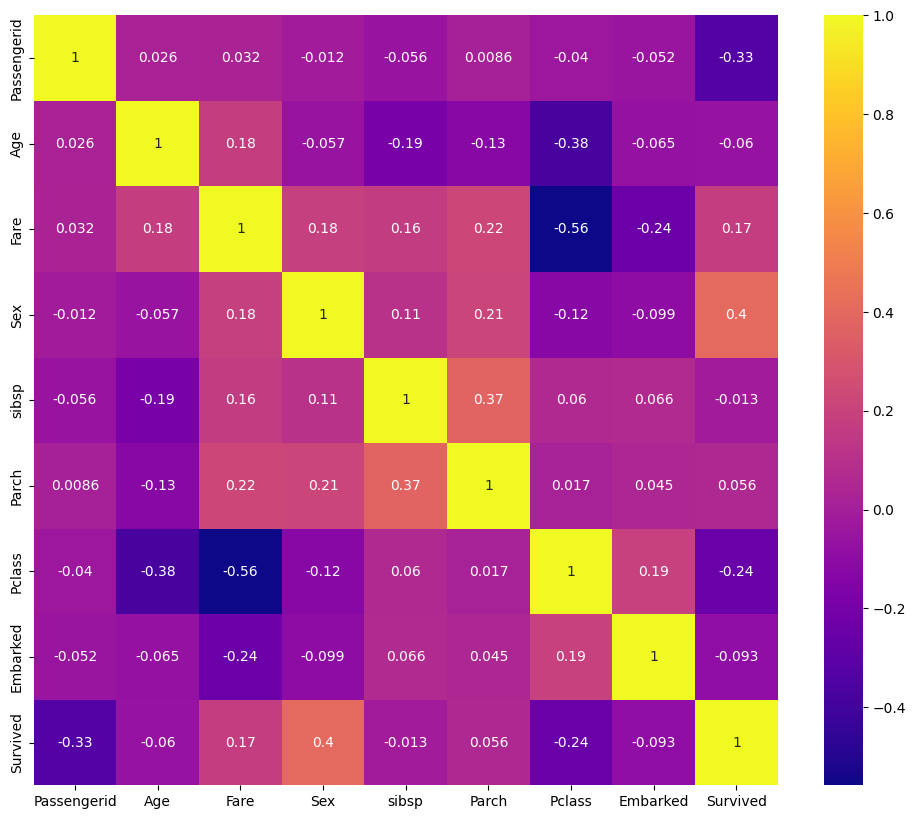

In [18]:
plt.figure(figsize=(12,10))
# we keep annot=True to make the values appear of df.corr() appear on the heatmap
sns.heatmap(df.corr(),annot=True,cmap=plt.cm.plasma)

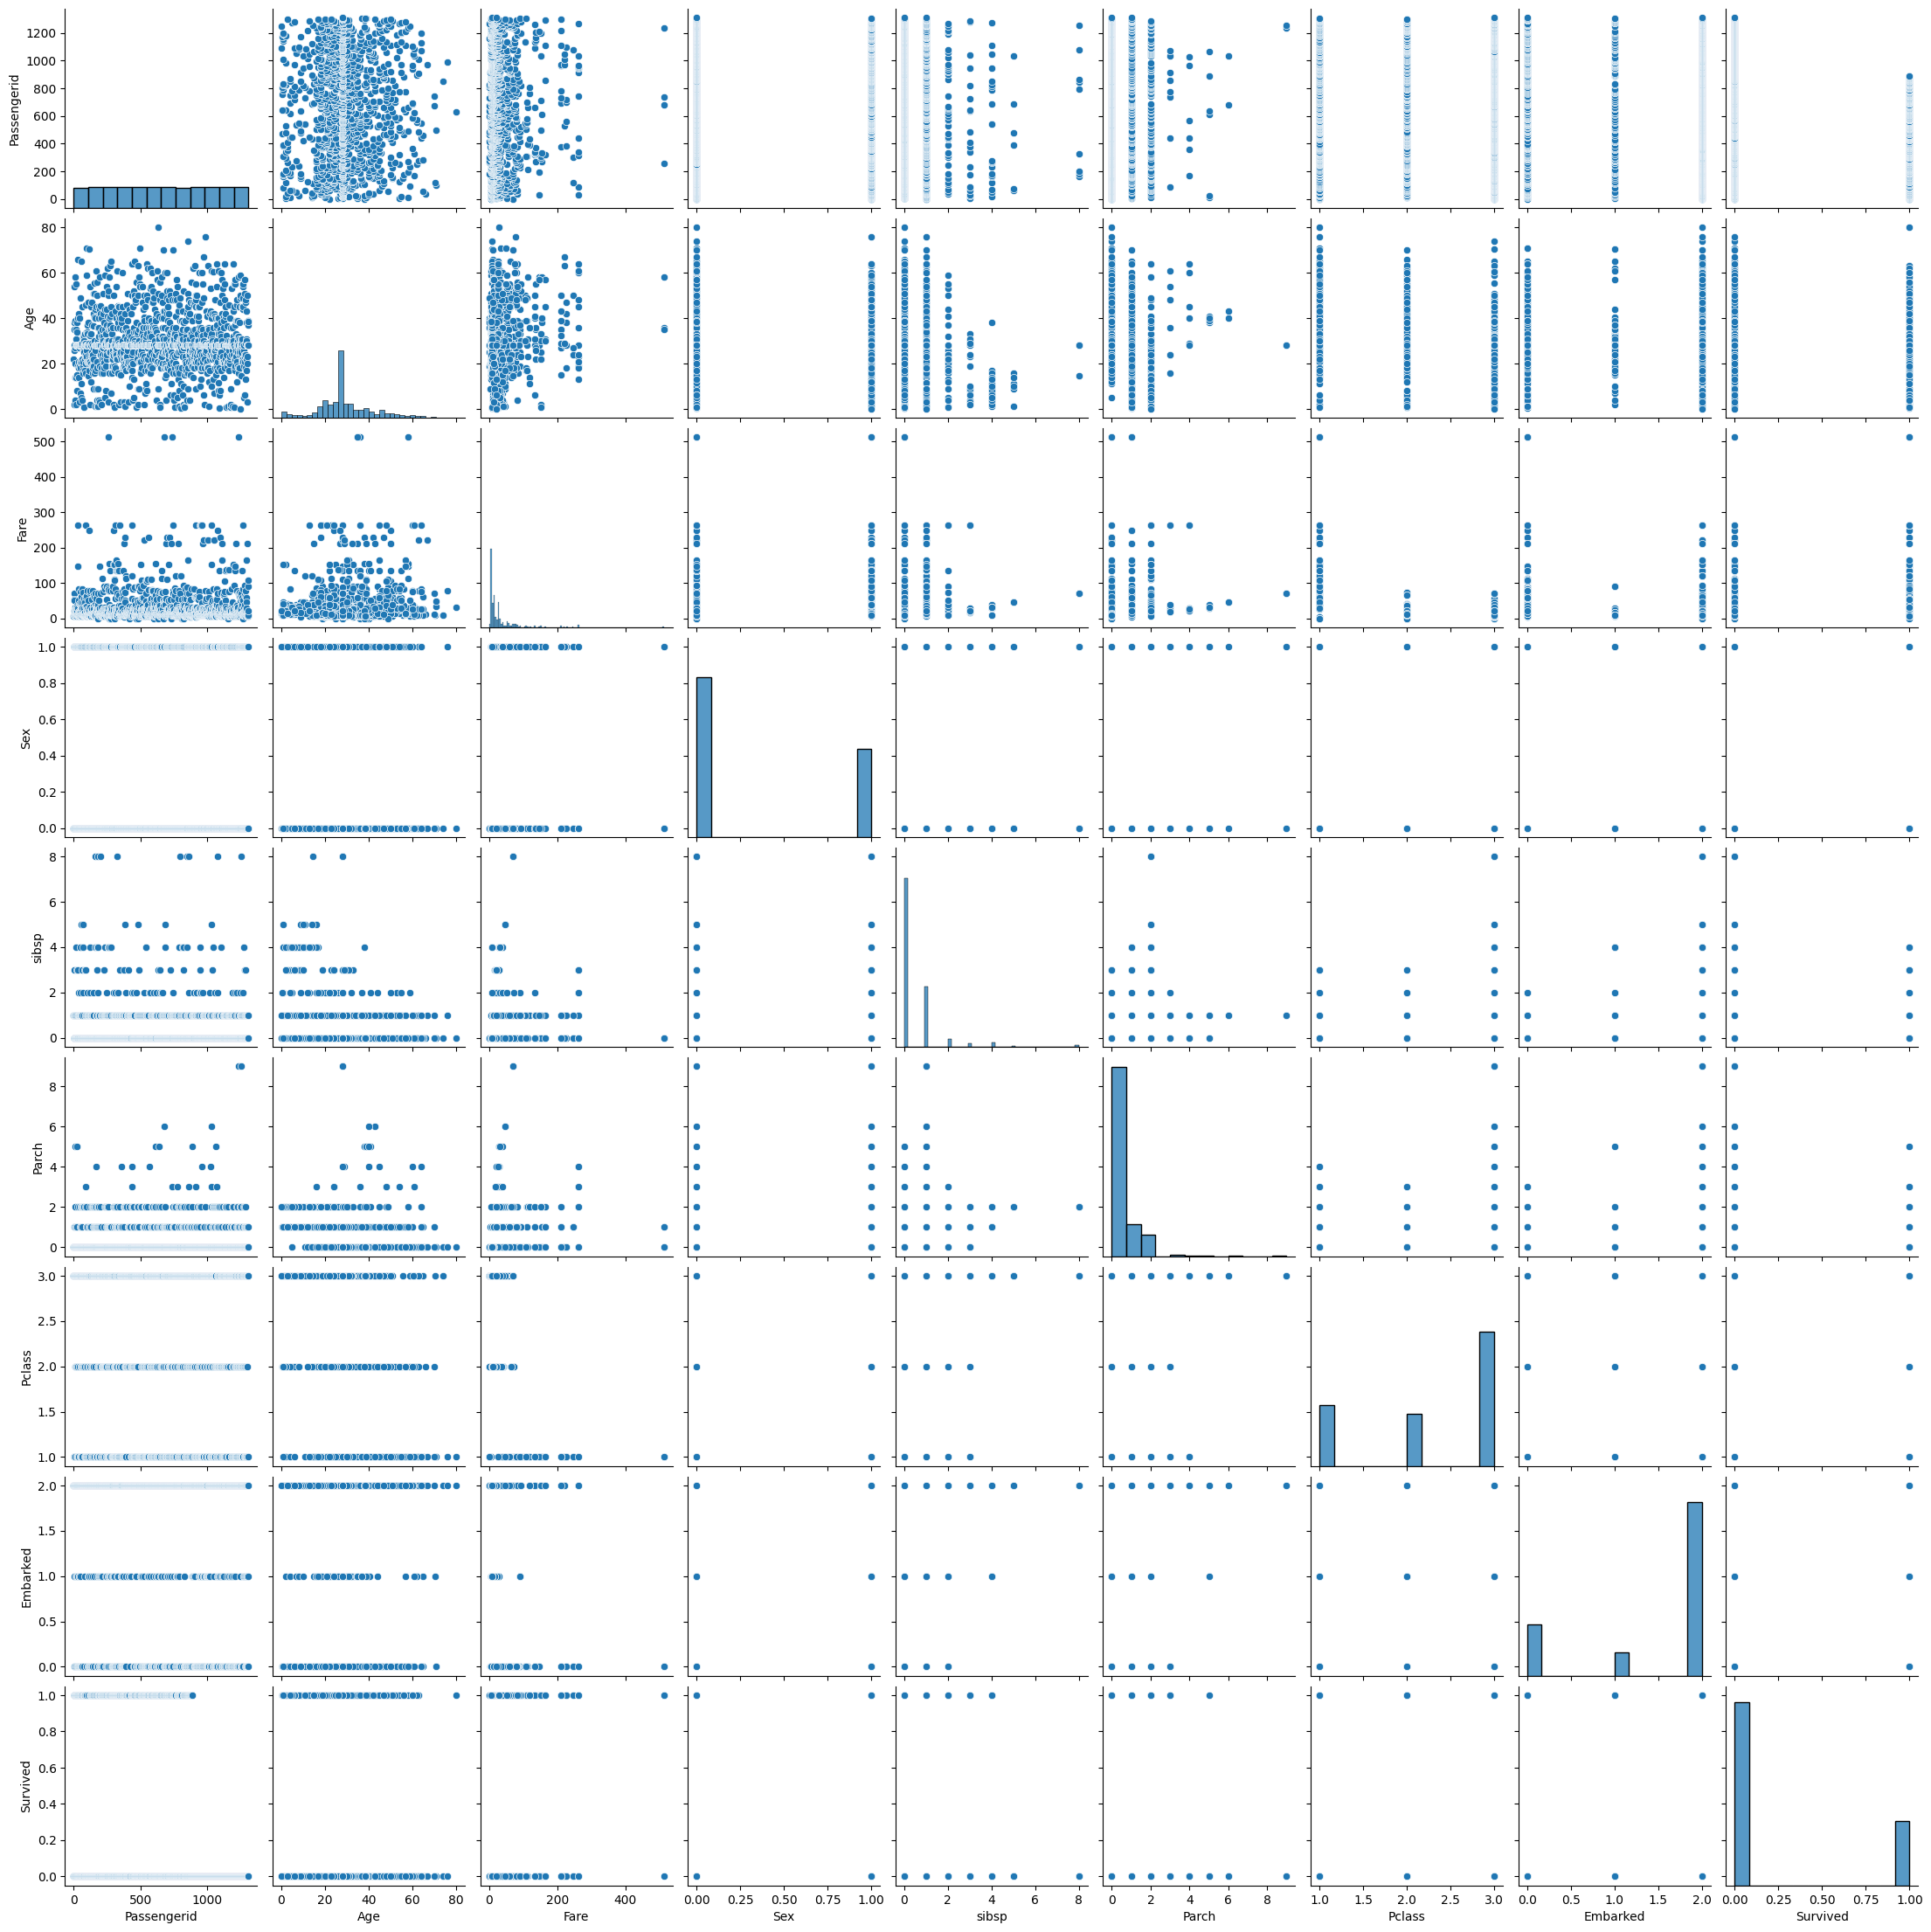

In [19]:
sns.pairplot(df)

In [20]:
df.columns

Index(['Passengerid', 'Age', 'Fare', 'Sex', 'sibsp', 'Parch', 'Pclass',
       'Embarked', 'Survived'],
      dtype='object')

# Building and Training the Model

In [22]:
# We will split the data for training and testing using train_test_split

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X=df.drop(['Survived'],axis=1)
Y=df['Survived']
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=1)

## 1) Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(max_iter=300)
lr.fit(X_train,y_train)
yhat=lr.predict(X_test)
print("Accuracy of Logistic Model is:",accuracy_score(yhat,y_test))

Accuracy of Logistic Model is: 0.8435114503816794


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Text(50.722222222222214, 0.5, 'Actual')

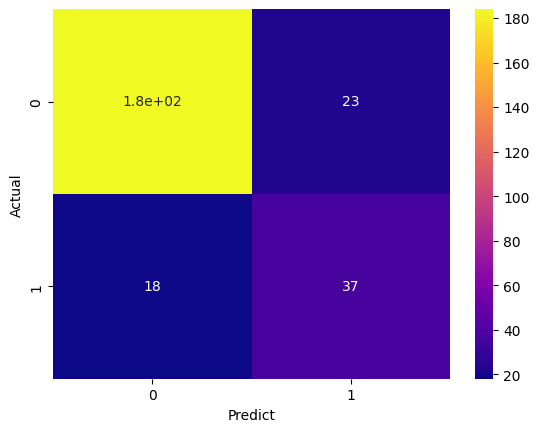

In [24]:
from sklearn.metrics import accuracy_score,confusion_matrix
ax=confusion_matrix(yhat,y_test)
sns.heatmap(ax,annot=True,cmap=plt.cm.plasma)
plt.xlabel('Predict')
plt.ylabel('Actual')

## 2) K-Nearest Neighbor

In [25]:
from sklearn.neighbors import KNeighborsClassifier
KN=KNeighborsClassifier(n_neighbors=3)
KN.fit(X_train,y_train)
yhat=KN.predict(X_test)
print("Accuracy of K-Nearest Neighbor Model is:",accuracy_score(yhat,y_test))

Accuracy of K-Nearest Neighbor Model is: 0.7938931297709924
